# RSSI measurement


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import scipy.stats as st

In [ ]:
df0 = pd.read_csv('Wtest0.csv', usecols=['RSSI'])
df1 = pd.read_csv('Wtest1.csv', usecols=['RSSI'])
df2 = pd.read_csv('Wtest2.csv', usecols=['RSSI'])
df3 = pd.read_csv('Wtest3.csv', usecols=['RSSI'])
df4 = pd.read_csv('Wtest4.csv', usecols=['RSSI'])
df5 = pd.read_csv('Wtest5.csv', usecols=['RSSI'])
df6 = pd.read_csv('Wtest6.csv', usecols=['RSSI'])
df7 = pd.read_csv('Wtest7.csv', usecols=['RSSI'])
df8 = pd.read_csv('Wtest8.csv', usecols=['RSSI'])
df9 = pd.read_csv('Wtest9.csv', usecols=['RSSI'])
df10 = pd.read_csv('Wtest10.csv', usecols=['RSSI'])



In [ ]:
def clean(df):
  df = df.RSSI.str.replace(r'\D', '')
  df = df.astype(float)
  df = - df
  return df

In [ ]:
df0 = clean(df0)
df1 = clean(df1)
df2 = clean(df2)
df3 = clean(df3)
df4 = clean(df4)
df5 = clean(df5)
df6 = clean(df6)
df7 = clean(df7)
df8 = clean(df8)
df9 = clean(df9)
df10 = clean(df10)

In [ ]:
df0.describe()

count    20.000000
mean    -16.900000
std       8.589467
min     -34.000000
25%     -24.250000
50%     -13.500000
75%     -10.000000
max     -10.000000
Name: RSSI, dtype: float64

In [ ]:
df = [df0 , df1, df2 , df3 , df4 , df5 , df6 , df7, df8 , df9, df10]
mean = []
for i in df :
  mean.append(i.mean())


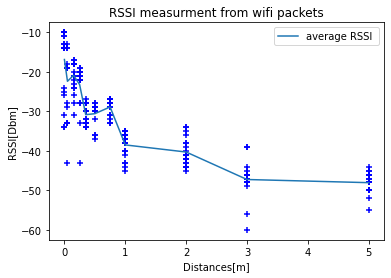

In [ ]:
x = np.array([0, 0.05, 0.15, 0.25, 0.35, 0.5 , 0.75 , 1 , 2 , 3 , 5])
y = [list(df0),list(df1),list(df2),list(df3),list(df4),list(df5),list(df6),list(df7),list(df8),list(df9),list(df10)]


for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye , marker = "+", color='blue')

plt.plot(x, mean , label = "average RSSI ")
plt.legend()
plt.title('RSSI measurment from wifi packets')
plt.xlabel("Distances[m]")
plt.ylabel("RSSI[Dbm]")
plt.show()

<function matplotlib.pyplot.show>

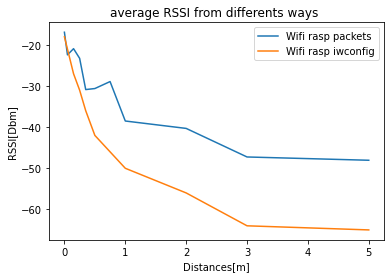

In [ ]:
x = np.array([0, 0.05, 0.15, 0.25, 0.35, 0.5 , 0.75 , 1 , 2 , 3 , 5])
z = np.array([-18,-21,-27,-31,-36,-42,-46,-50,-56,-64, -65])

plt.plot(x, mean , label = 'Wifi rasp packets ')
plt.plot(x,z,label='Wifi rasp iwconfig')
plt.legend()
plt.title('average RSSI from differents ways ')
plt.xlabel("Distances[m]")
plt.ylabel("RSSI[Dbm]")
plt.show

In [ ]:
df = pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], axis=1)
df.columns = ['0','0.05','0.15','0.25','0.35','0.5','0.75','1','2','3','5']
df.describe()

,0,0.05,0.15,0.25,0.35,0.5,0.75,1,2,3,5
count,20.000000,20.000000,20.0000,20.000000,20.0000,20.000000,20.00000,20.000000,20.0000,20.000000,20.000000
mean,-16.900000,-22.400000,-20.9000,-23.250000,-30.8500,-30.600000,-28.90000,-38.500000,-40.3000,-47.250000,-48.050000
std,8.589467,7.949843,3.9855,5.820789,2.5808,2.623778,1.97084,3.187145,3.4504,4.609772,2.605157
min,-34.000000,-43.000000,-31.0000,-43.000000,-34.0000,-37.000000,-33.00000,-45.000000,-45.0000,-60.000000,-55.000000
25%,-24.250000,-28.250000,-23.2500,-22.000000,-33.0000,-30.000000,-29.50000,-40.250000,-43.0000,-48.000000,-50.000000
50%,-13.500000,-19.000000,-19.0000,-21.500000,-31.0000,-30.000000,-28.00000,-37.500000,-41.0000,-47.000000,-48.000000
75%,-10.000000,-19.000000,-18.0000,-20.000000,-28.0000,-29.000000,-28.00000,-36.000000,-38.0000,-46.000000,-46.000000
max,-10.000000,-13.000000,-17.0000,-19.000000,-27.0000,-28.000000,-27.00000,-35.000000,-34.0000,-39.000000,-44.000000


In [ ]:
xi = np.array(['0', '0.05', '0.15', '0.25', '0.35', '0.5' , '0.75' , '1' , '2' , '3' , '5'])
CI = []
for i in xi :
  CI.append(st.t.interval(alpha=0.95, df=len(df[i])-1, loc=np.mean(df[i]), scale=st.sem(df[i])))


In [ ]:
dff = pd.DataFrame(CI, index=['0', '0.05', '0.15', '0.25', '0.35', '0.5' , '0.75' , '1' , '2' , '3' , '5'], columns =['CI min', 'CI max'])
dff = pd.concat([dff,df.mean()], axis=1)
dff.columns = ['CI min', 'CI max', 'mean']
dff

,CI min,CI max,mean
0,-20.919994,-12.880006,-16.90
0.05,-26.120641,-18.679359,-22.40
0.15,-22.765271,-19.034729,-20.90
0.25,-25.974213,-20.525787,-23.25
0.35,-32.057851,-29.642149,-30.85
0.5,-31.827966,-29.372034,-30.60
0.75,-29.822382,-27.977618,-28.90
1,-39.991630,-37.008370,-38.50
2,-41.914837,-38.685163,-40.30
3,-49.407440,-45.092560,-47.25
